In [101]:
import numpy as np
import pandas as pd
import duckdb
import seaborn as sns
import time
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import ttest_rel



In [7]:
VTI_df = pd.read_csv('VTI10Y.csv')
GXC_df = pd.read_csv('GXC10Y.csv')

In [81]:
# data cleaning 
VTI_df.columns = VTI_df.columns.str.strip()
GXC_df.columns = GXC_df.columns.str.strip()
VTI_df['Date'] = pd.to_datetime(VTI_df['Date'])
GXC_df['Date'] = pd.to_datetime(GXC_df['Date'])

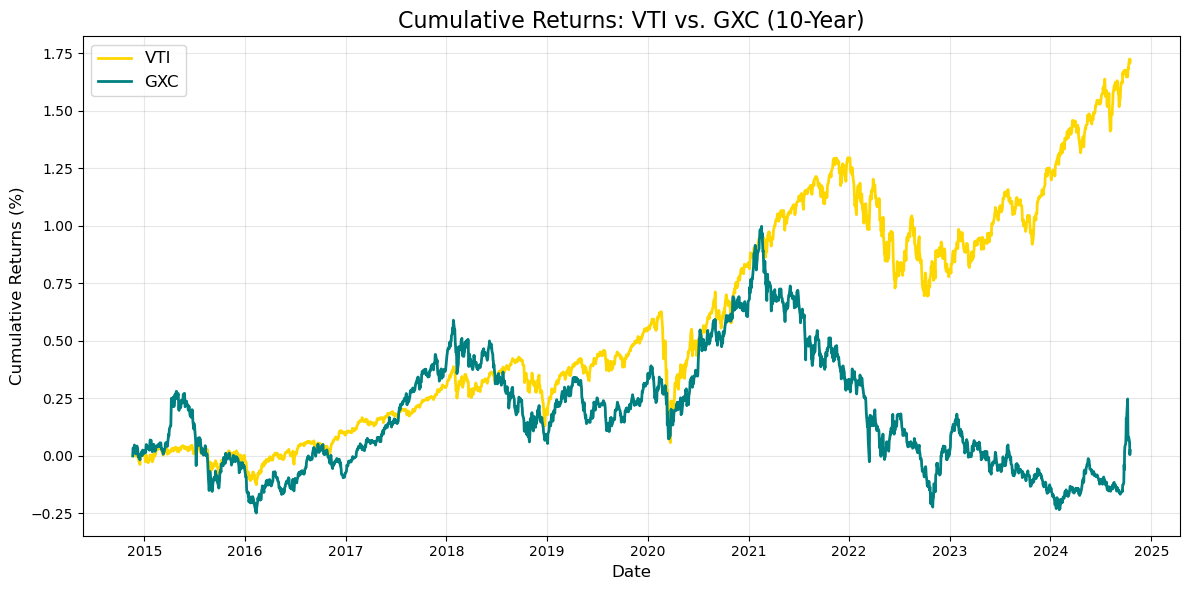

VTI Growth Rate: 172.02%
GXC Growth Rate: 2.30%


In [96]:
# Calculating cumulative returns 

TotalIndexNew['Cumulative_VTI'] = (TotalIndexNew['VTI'] / TotalIndexNew['VTI'].iloc[0]) - 1
TotalIndexNew['Cumulative_GXC'] = (TotalIndexNew['GXC'] / TotalIndexNew['GXC'].iloc[0]) - 1

# Plotting cumulative returns
plt.figure(figsize=(12, 6))

plt.plot(TotalIndexNew['Date'], TotalIndexNew['Cumulative_VTI'], label='VTI', color='gold', linewidth=2)
plt.plot(TotalIndexNew['Date'], TotalIndexNew['Cumulative_GXC'], label='GXC', color='teal', linewidth=2)
plt.title('Cumulative Returns: VTI vs. GXC (10-Year)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Returns (%)', fontsize=12)
plt.legend(loc='upper left', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

TotalIndexNew['VTI']=TotalIndexNew['VTI'].dropna()

vti_growth_rate = ((TotalIndexNew['VTI'].iloc[-1] - TotalIndexNew['VTI'].iloc[0]) / TotalIndexNew['VTI'].iloc[0]) * 100
gxc_growth_rate = ((TotalIndexNew['GXC'].iloc[-1] - TotalIndexNew['GXC'].iloc[0]) / TotalIndexNew['GXC'].iloc[0]) * 100

# Print the results
print(f"VTI Growth Rate: {vti_growth_rate:.2f}%")
print(f"GXC Growth Rate: {gxc_growth_rate:.2f}%")



**Graph 1** 
* Graph 1 shows how the Vanguard Total Stock Market ETF (VTI) and the SPDR S&P China ETF (GXC) performed over 10 years. The yellow line illustrates VTI while the green line illustrates GXC. in the span of 10 years, VTI had a total increase of 172.02%, while GXC only grew by 2.30%. Both dropped during the COVID-19 pandemic in 2020, but VTI bounced back quickly and kept growing, while GXC struggled to recover and fell further after 2021. This shows that VTI had stronger and more steady growth compared to GXC, which was more unstable and performed poorly overall.

In [97]:
#Calculate cumulative yearly growth rates / t-test for signifigance 
VTI_yearly = TotalIndexNew[['Date', 'VTI']].set_index('Date').resample('YE').last()
GXC_yearly = TotalIndexNew[['Date', 'GXC']].set_index('Date').resample('YE').last()

VTI_yearly['Growth Rate (%)'] = VTI_yearly['VTI'].pct_change() * 100
GXC_yearly['Growth Rate (%)'] = GXC_yearly['GXC'].pct_change() * 100

VTI_yearly = VTI_yearly.dropna()
GXC_yearly = GXC_yearly.dropna()

# Merge yearly growth rates
yearly_growth_rates = pd.merge(
    VTI_yearly['Growth Rate (%)'].reset_index(),
    GXC_yearly['Growth Rate (%)'].reset_index(),
    on='Date',
    suffixes=('_VTI', '_GXC')
)


yearly_growth_rates['Cumulative Growth (%)_VTI'] = ((1 + yearly_growth_rates['Growth Rate (%)_VTI'] / 100).cumprod() - 1) * 100
yearly_growth_rates['Cumulative Growth (%)_GXC'] = ((1 + yearly_growth_rates['Growth Rate (%)_GXC'] / 100).cumprod() - 1) * 100

# t-test 
vti_cumulative = yearly_growth_rates['Cumulative Growth (%)_VTI'].tolist()
gxc_cumulative = yearly_growth_rates['Cumulative Growth (%)_GXC'].tolist()

t_stat, p_value = ttest_rel(vti_cumulative, gxc_cumulative)

print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

if p_value < 0.05 and t_stat > 0:
    print("Conclusion: VTI's cumulative growth rate is significantly greater than GXC's (p < 0.05).")
else:
    print("Conclusion: No significant difference in cumulative growth rates between VTI and GXC (p >= 0.05).")


T-Statistic: 2.9182
P-Value: 0.0171
Conclusion: VTI's cumulative growth rate is significantly greater than GXC's (p < 0.05).


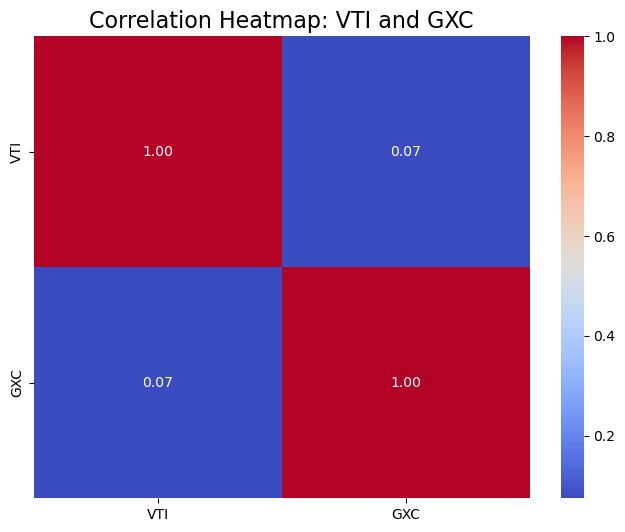

Correlation between VTI and GXC: 0.0749


In [110]:
# Calculate the correlation between VTI and GXC
TotalIndexNew = TotalIndexNew.dropna()  
correlation = TotalIndexNew['VTI'].corr(TotalIndexNew['GXC'])
correlation_matrix = TotalIndexNew[['VTI', 'GXC']].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation Heatmap: VTI and GXC', fontsize=16)
plt.show()

# Print the correlation coefficient
print(f"Correlation between VTI and GXC: {correlation:.4f}")


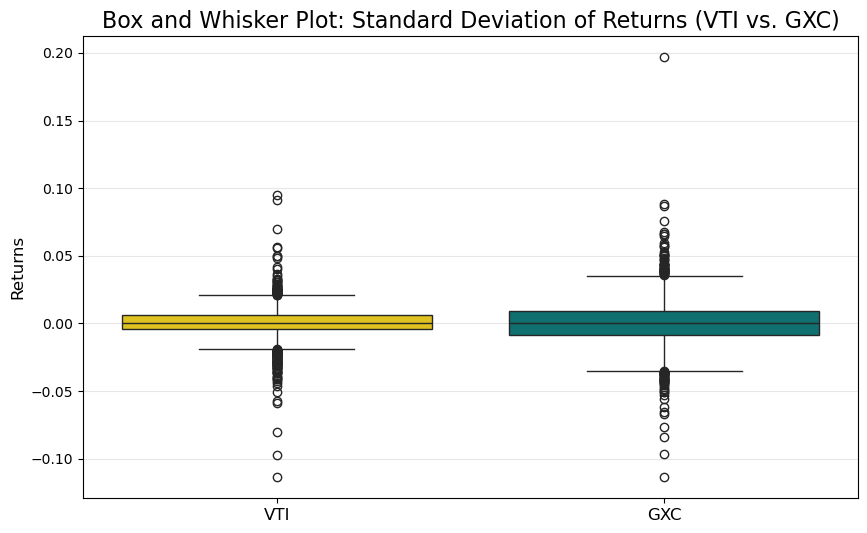

Standard Deviation of VTI: 50.1707
Standard Deviation of GXC: 19.3774


In [112]:
#calculate standard deviation between VTI and GXC's return 
vti_std = TotalIndexNew['VTI'].std()
gxc_std = TotalIndexNew['GXC'].std()
TotalIndexNew['VTI_Returns'] = TotalIndexNew['VTI'].pct_change()
TotalIndexNew['GXC_Returns'] = TotalIndexNew['GXC'].pct_change()
returns_data = TotalIndexNew[['VTI_Returns', 'GXC_Returns']].dropna()

# Create the box-and-whisker plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=returns_data, palette=['gold', 'teal'])
plt.title('Box and Whisker Plot: Standard Deviation of Returns (VTI vs. GXC)', fontsize=16)
plt.ylabel('Returns', fontsize=12)
plt.xticks([0, 1], ['VTI', 'GXC'], fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()

# Print the STD
print(f"Standard Deviation of VTI: {vti_std:.4f}")
print(f"Standard Deviation of GXC: {gxc_std:.4f}")


**Evaluation of Significance** : 
* The cumulative return graph clearly demonstrates that VTI outperforms GXC over time. Although both start at the same level, VTI achieves a total growth rate of 172.02%, while GXC only grows by 2.30% over the 10-year period, which represents a significant difference.

* Additionally, the t-test comparing the cumulative yearly growth rates resulted in a p-value of 0.0171, which is less than the threshold of 0.05. As a result, the test rejects the null hypothesis, indicating that the difference in cumulative yearly growth rates between VTI and GXC is statistically significant.

**Conclusion:**
* The data analysis demonstrates that VTI significantly outperforms GXC over the past 10 years in terms of total returns. This directly addresses the first research question, which sought to compare the performance of U.S. stocks (measured by the Vanguard Total Stock Market ETF) and Chinese stocks (measured by the GXC ETF) in terms of total returns and volatility.

* Correlation: Analysis of the correlation coefficient showed that there was a 0.08  When one increases or decreases, the other shows a very small tendency to move in the same direction, but the relationship is not strong.The value is close to 0, which indicates that their price movements or returns are largely independent of each other.


* Total Returns: VTI achieved a total growth rate of 172.02%, while GXC only grew by 2.30% over the 10-year period, highlighting the superior performance of U.S. markets.
* Trends and Patterns: VTI exhibited consistent long-term growth with compounding effects driving its cumulative returns. In contrast, GXC showed more volatile performance, with years of strong growth followed by significant declines, resulting in its relatively flat overall growth.

**limitations**
* The t-test may have concluded that there is no significant difference due to the high variability in yearly growth rates or the small sample size (only 9 yearly growth rates). With just 9 years of data, the t-test has low statistical power to detect a significant difference unless the yearly growth rates are consistently and substantially different.
* another limiation 